take previous data and get next day resulst

[*********************100%***********************]  1 of 1 completed
<ipython-input-14-9f9b320620b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Naive_Forecast'] = data['Close'].shift(1)


Mean Absolute Error (MAE): 0.892578966477338


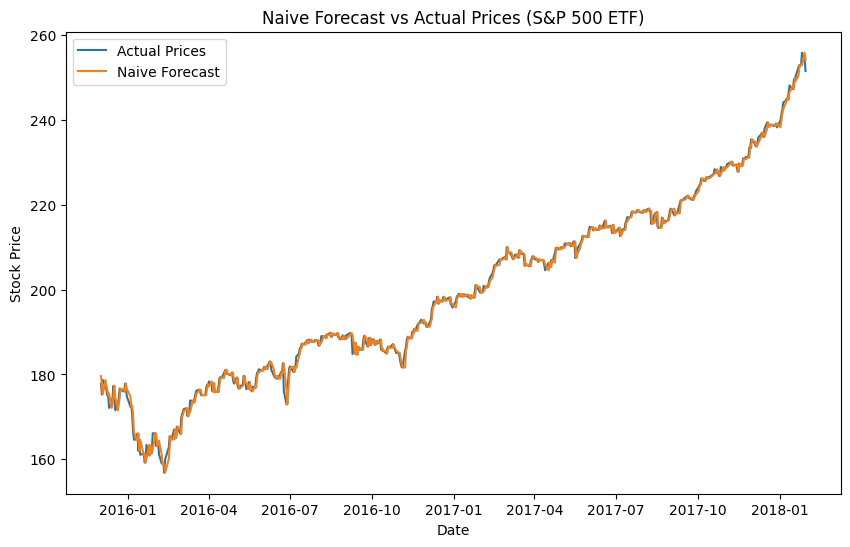

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Download S&P 500 ETF (SPY) data from Yahoo Finance
# Fetch data for the period December 2015 to January 2018
data = yf.download('SPY', start='2015-12-01', end='2018-01-31')
data2= data.copy

# Step 2: Preprocess the data
# Keep only the 'Close' column for simplicity
data = data[['Close']]

# Step 3: Create the naive forecast
# Shift the closing prices by 1 day to create the naive forecast
data['Naive_Forecast'] = data['Close'].shift(1)

# Drop the first row since there's no previous value to use for the forecast
data = data.dropna()

# Step 4: Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(data['Close'], data['Naive_Forecast'])
print(f'Mean Absolute Error (MAE): {mae}')

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.plot(data.index, data['Naive_Forecast'], label='Naive Forecast')
plt.title('Naive Forecast vs Actual Prices (S&P 500 ETF)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

5-Day Moving Average


In [15]:
# Step 3: Calculate 5-Day Moving Average
data['MA_5'] = data['Close'].rolling(window=5).mean()

# Drop rows with NaN values (since moving averages require a window of data)
data = data.dropna()

# Step 4: Calculate Mean Absolute Error (MAE) for 5-Day Moving Average
mae_ma_5 = mean_absolute_error(data['Close'], data['MA_5'])
print(f'MAE for 5-Day Moving Average: {mae_ma_5}')



MAE for 5-Day Moving Average: 0.9504494052463108


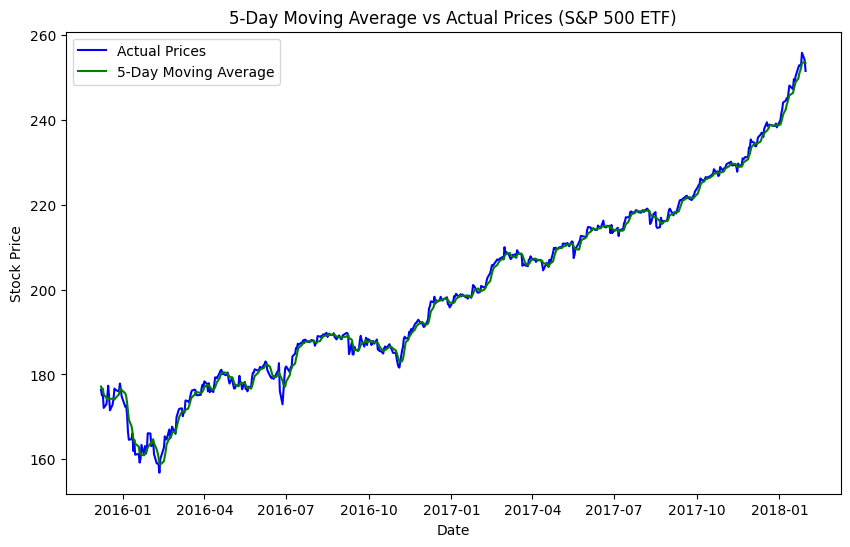

In [16]:
# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(data.index, data['MA_5'], label='5-Day Moving Average', color='green')
plt.title('5-Day Moving Average vs Actual Prices (S&P 500 ETF)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

20-Day Moving Average


MAE for 20-Day Moving Average: 2.4719736300594746


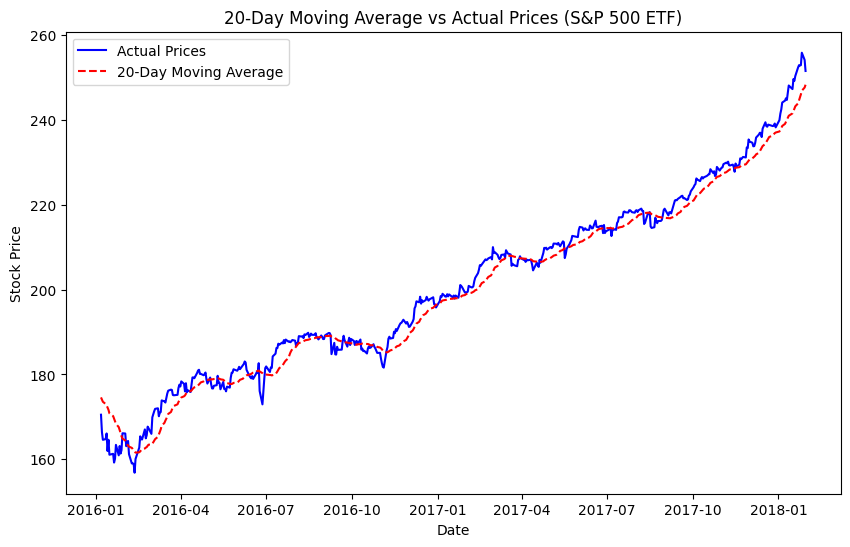

In [17]:
# Step 3: Calculate 20-Day Moving Average
data['MA_20'] = data['Close'].rolling(window=20).mean()

# Drop rows with NaN values (since moving averages require a window of data)
data = data.dropna()

# Step 4: Calculate Mean Absolute Error (MAE) for 20-Day Moving Average
mae_ma_20 = mean_absolute_error(data['Close'], data['MA_20'])
print(f'MAE for 20-Day Moving Average: {mae_ma_20}')

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(data.index, data['MA_20'], label='20-Day Moving Average', color='red', linestyle='--')
plt.title('20-Day Moving Average vs Actual Prices (S&P 500 ETF)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:
# Print MAE values for comparison
print(f"Naive Forecast MAE: {mae}")
print(f"5-Day Moving Average MAE: {mae_ma_5}")
print(f"20-Day Moving Average MAE: {mae_ma_20}")

Naive Forecast MAE: 0.892578966477338
5-Day Moving Average MAE: 0.9504494052463108
20-Day Moving Average MAE: 2.4719736300594746


Naive Approach:

Assumption: The naive approach assumes that the next day's price will be the same as the current day's price.

Limitations:

It does not account for trends, seasonality, or patterns in the data.

It cannot capture any underlying dynamics or relationships in the data.

It performs poorly in volatile markets where prices change rapidly.

Moving Average Methods:

Assumption: The moving average methods assume that the future price will follow the average of past prices over a specific window.

Limitations:

They are lagging indicators, meaning they react slowly to sudden changes in price.

They smooth out short-term fluctuations, which can lead to missing important trends or patterns.

They do not account for external factors (e.g., news, earnings reports, geopolitical events) that can significantly impact stock prices.

They are not adaptive and cannot learn from new data.

ARIMA


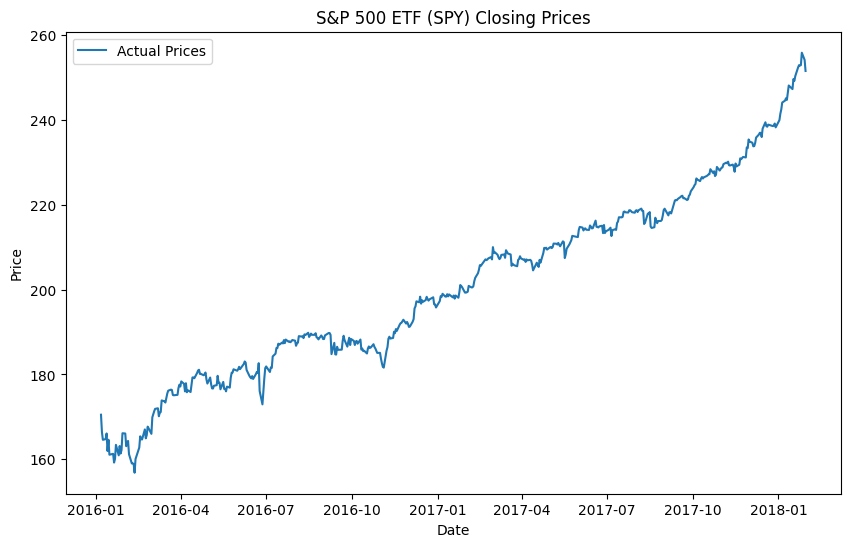

In [21]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.title('S&P 500 ETF (SPY) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [24]:
# Function to check stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

# Check stationarity of the closing prices
check_stationarity(data['Close'])

# If data is non-stationary, apply differencing
data['Close_diff'] = data['Close'].diff().dropna()

# Check stationarity again
check_stationarity(data['Close_diff'].dropna())

ADF Statistic: 0.8504577277629991
p-value: 0.9924084986164994
Critical Values: {'1%': np.float64(-3.4430126933746767), '5%': np.float64(-2.8671249839002764), '10%': np.float64(-2.569744590233924)}
Data is non-stationary
ADF Statistic: -25.741663461267525
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4430126933746767), '5%': np.float64(-2.8671249839002764), '10%': np.float64(-2.569744590233924)}
Data is stationary


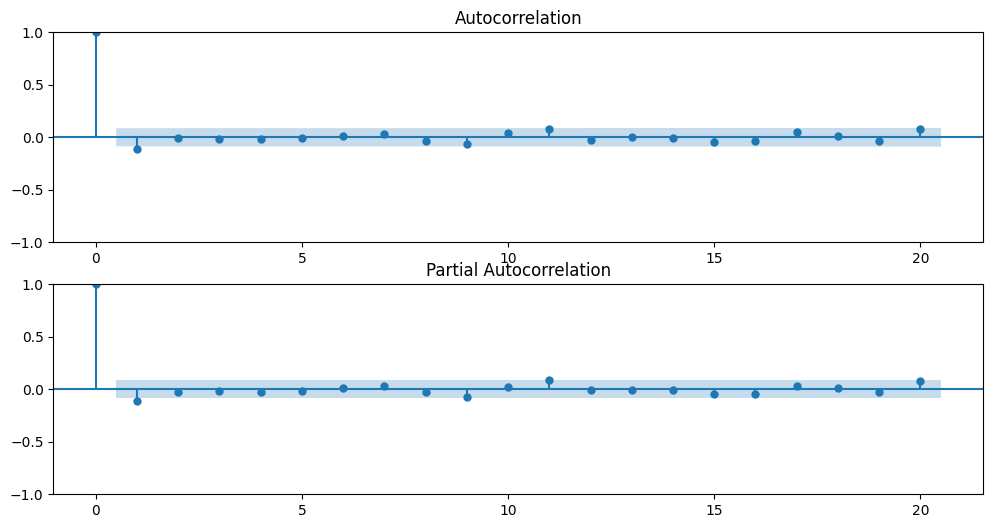

In [25]:
# Plot ACF and PACF for differenced data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data['Close_diff'].dropna(), lags=20, ax=plt.gca())
plt.subplot(2, 1, 2)
plot_pacf(data['Close_diff'].dropna(), lags=20, ax=plt.gca())
plt.show()

In [26]:
# Fit ARIMA model
model = ARIMA(data['Close'], order=(1, 1, 1))  # (p, d, q)
results = model.fit()

# Print model summary
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                  521
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -837.371
Date:                Mon, 17 Mar 2025   AIC                           1680.741
Time:                        18:12:58   BIC                           1693.503
Sample:                             0   HQIC                          1685.741
                                - 521                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0898      0.336     -0.267      0.790      -0.749       0.569
ma.L1         -0.0087      0.342     -0.025      0.980      -0.679       0.662
sigma2         1.4663      0.060     24.488      0.0

MAE for ARIMA Model: 0.842722903902421


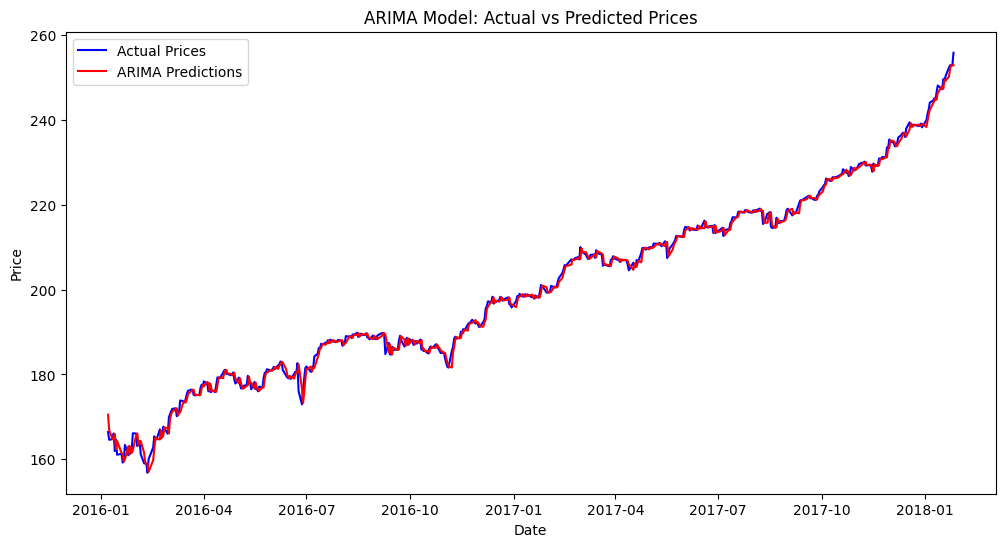

In [39]:
# Make predictions
data['ARIMA_Predictions'] = results.predict(start=1, end=len(data)-1, typ='levels')

# Drop NaN values
data = data.dropna()

# Calculate MAE
mae_arima = mean_absolute_error(data['Close'], data['ARIMA_Predictions'])
print(f'MAE for ARIMA Model: {mae_arima}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(data.index, data['ARIMA_Predictions'], label='ARIMA Predictions', color='red')
plt.title('ARIMA Model: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
# Predict future values (e.g., next 30 days)
future_steps = 30
future_index = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='B')[1:]  # Business days
future_predictions = results.predict(start=len(data), end=len(data) + future_steps - 1, typ='levels')

# Print the predicted values
print("Future Predicted Values:")
print(future_predictions)

Future Predicted Values:
518    252.957665
519    255.608346
520    254.365001
521    251.851238
522    251.828059
523    251.830139
524    251.829953
525    251.829969
526    251.829968
527    251.829968
528    251.829968
529    251.829968
530    251.829968
531    251.829968
532    251.829968
533    251.829968
534    251.829968
535    251.829968
536    251.829968
537    251.829968
538    251.829968
539    251.829968
540    251.829968
541    251.829968
542    251.829968
543    251.829968
544    251.829968
545    251.829968
546    251.829968
547    251.829968
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
